# (En) Classification and Regression using Deep Learning on tabular data.  <br>  (Es) Clasificación y Regresión mediante Aprendizaje Profundo en datos tabulares.
### *Author: Andres Felipe Patiño*


---
---

# Classification using Deep Learning

**Project Description**

This notebook aims to build a Deep Neural Network (DNN) to solve a binary classification problem. Specifically, it predicts whether a house price is below or above the median value. Throughout the project, key skills are developed in data preprocessing, model design, training, and neural network evaluation.

**Notebook Content:**

1. **Data Exploration and Processing:**
   - Loading and analyzing the dataset.
   - Cleaning, normalizing, and preparing the data for the model.
2. **Building and Training the Neural Network:**
   - Creating a deep neural network using deep learning libraries.
   - Training the model on the prepared dataset.
3. **Loss and Accuracy Visualization:**
   - Generating plots to show the evolution of loss and accuracy during training.
4. **Incorporating Regularization:**
   - Implementing regularization techniques to improve model generalization and prevent overfitting.

**Purpose:**

This notebook was designed as an educational and practical resource to include in a personal portfolio. It demonstrates competencies in using neural networks for real-world classification problems. The methodology is based on modern deep learning practices, inspired by works such as those by Joseph Lee Wei En (2019).

**Important Notes:**

- Results may vary due to randomness in dataset splitting and model initialization.
- Steps and code are carefully documented to facilitate reproducibility.

---

**Descripción del Proyecto**

Este notebook tiene como objetivo construir una red neuronal profunda (DNN, por sus siglas en inglés) para resolver un problema de clasificación binaria. En este caso, se predice si el precio de una casa está por debajo o por encima del valor mediano. A lo largo del proyecto, se desarrollan habilidades clave en el preprocesamiento de datos, diseño de modelos, entrenamiento, y evaluación de redes neuronales.

**Contenido del Notebook:**

1.	Exploración y Procesamiento de Datos:
    - Carga y análisis del conjunto de datos.
    - Limpieza, normalización, y preparación de los datos para el modelo.
2.	Construcción y Entrenamiento de la Red Neuronal:
    - Creación de una red neuronal profunda utilizando librerías de aprendizaje profundo.
    - Entrenamiento del modelo sobre el conjunto de datos preparado.
3.	Visualización de Pérdidas y Precisión:
    - Generación de gráficos que muestran la evolución de la pérdida y precisión durante el entrenamiento.
4.	Incorporación de Regularización:
    - Implementación de técnicas de regularización para mejorar la generalización del modelo y evitar el sobreajuste.

**Propósito:**

Este notebook fue diseñado como un recurso educativo y práctico para incluir en un portafolio personal. Es una demostración de competencias en el uso de redes neuronales para problemas reales de clasificación. La metodología se basa en prácticas modernas de aprendizaje profundo, inspirada en trabajos como el de Joseph Lee Wei En (2019).

Notas Importantes:

- Los resultados pueden variar debido al azar en la división del conjunto de datos y la inicialización del modelo.
- Los pasos y código están cuidadosamente documentados para facilitar la reproducibilidad.

---

## 1. Exploring and Processing the Data

We first have to read in the CSV file that we've been given. We'll use a package called pandas for that:

In [38]:
# Importing the pandas library and assigning it the alias 'pd'.
# Pandas is a powerful Python library used for data manipulation, analysis, and handling structured data such as CSV files or Excel sheets.
import pandas as pd

In [39]:
data_path = "Files/housepricedata.csv"  
# Defines the relative path to the CSV file containing the data. 
# The file 'housepricedata.csv' is expected to be located in the 'Files' directory relative to the notebook's location.

df = pd.read_csv(data_path, sep=',', encoding='utf-8')  
# Reads the CSV file specified in 'data_path' into a pandas DataFrame named 'df'. 
# - 'sep' specifies the delimiter used in the file (in this case, a comma).
# - 'encoding' ensures the file is read using UTF-8 encoding to handle special characters.

df.head(5)  
# Displays the first 5 rows of the DataFrame 'df'. 
# This is useful for quickly inspecting the structure and content of the data.

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [5]:
df.shape
# Returns the dimensions of the DataFrame 'df' as a tuple (number of rows, number of columns).
# This is useful for quickly understanding the size of the dataset.

(1460, 11)

The dataset that we have now is in what is called a pandas dataframe. To convert it to an array, simply access its values:

In [40]:
dataset = df.values  
# Converts the DataFrame 'df' into a NumPy array and assigns it to the variable 'dataset'. 
# This extracts the raw data values from the DataFrame, excluding column and row labels.
# Useful for numerical operations or when working with libraries that require NumPy arrays.

In [41]:
dataset
# This variable contains the raw data extracted from the DataFrame `df` in the form of a NumPy array.
# It includes all the data values from the original dataset, excluding any column names or indices.
# `dataset` can now be used for numerical computations or as input to machine learning models.

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

Now, we choose our input features and the Target we wish to predict.

In [44]:
X = dataset[:, 0:10]  
# Extracts all rows and columns 0 to 9 (10 columns in total) from the 'dataset' NumPy array.
# This represents the input features (independent variables) for the model.

Y = dataset[:, 10]  
# Extracts all rows and the 10th column (index 10) from the 'dataset' NumPy array.
# This represents the target variable (dependent variable) for the model.

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from Scikit-learn library which scales our data to be between 0 and 1.

In [45]:
from sklearn import preprocessing  
# Imports the `preprocessing` module from the `scikit-learn` library. 
# The `preprocessing` module provides functions and classes for feature scaling, normalization, encoding categorical variables, and other data preprocessing techniques.

In [46]:
min_max_scaler = preprocessing.MinMaxScaler()  
# Creates an instance of the MinMaxScaler from the sklearn.preprocessing module.
# The MinMaxScaler scales the input data to a specified range, typically [0, 1], by transforming each feature individually.

X_scale = min_max_scaler.fit_transform(X)  
# Applies the MinMaxScaler to the feature matrix 'X'.
# - `fit_transform()` computes the minimum and maximum values for each feature in 'X' and scales the data accordingly.
# The result, 'X_scale', contains the scaled version of 'X', where all feature values are normalized to the range [0, 1].

In [47]:
X_scale  
# Refers to the scaled version of the input features 'X', where all feature values are normalized to a specific range (usually [0, 1]).
# Comment clarification: The target or output variable (Y) should not be scaled, as it represents the dependent variable that the model aims to predict.

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.

In [48]:
from sklearn.model_selection import train_test_split  
# Imports the `train_test_split` function from the `sklearn.model_selection` module.
# This function is used to split datasets into training and testing subsets.
# It is particularly useful for dividing data into subsets for training, validation, and testing in machine learning workflows.

In [49]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.1)  
# Splits the scaled feature matrix 'X_scale' and the target variable 'Y' into training and combined validation/testing sets.  
# - `train_test_split` shuffles and splits the data into subsets.  
# - `test_size=0.1` specifies that 10% of the data should be allocated to the validation/testing set, while 90% goes to the training set.  
# - `X_train` and `Y_train` contain the training data (90% of the dataset).  
# - `X_val_and_test` and `Y_val_and_test` contain the remaining 10% of the data, which will be further split into validation and testing sets.

In [50]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)  
# Splits the combined validation and test sets ('X_val_and_test', 'Y_val_and_test') into separate validation and test sets.  
# - `test_size=0.5` specifies that 50% of the combined set should go to the test set and the remaining 50% to the validation set.  
# - `X_val` and `Y_val` contain the features and targets for the validation set.  
# - `X_test` and `Y_test` contain the features and targets for the test set.  
# This step ensures the data is divided into three subsets: training, validation, and testing.

In [51]:
print("Training set shape:")  
# Outputs a label to indicate the shapes of the training set.

print(f"  X_train: {X_train.shape}, Y_train: {Y_train.shape}")  
# Uses an f-string to display the shapes of the feature matrix (`X_train`) and target vector (`Y_train`) for the training set.

print("Validation set shape:")  
# Outputs a label to indicate the shapes of the validation set.

print(f"  X_val: {X_val.shape}, Y_val: {Y_val.shape}")  
# Uses an f-string to display the shapes of the feature matrix (`X_val`) and target vector (`Y_val`) for the validation set.

print("Test set shape:")  
# Outputs a label to indicate the shapes of the test set.

print(f"  X_test: {X_test.shape}, Y_test: {Y_test.shape}")  
# Uses an f-string to display the shapes of the feature matrix (`X_test`) and target vector (`Y_test`) for the test set.

Training set shape:
  X_train: (1314, 10), Y_train: (1314,)
Validation set shape:
  X_val: (73, 10), Y_val: (73,)
Test set shape:
  X_test: (73, 10), Y_test: (73,)


---

## 2. Building and Training Our First Neural Network for "Classification"

We will be using Keras to build our architecture. Let's import the code from Keras that we will need to use:

In [52]:
from keras.models import Sequential  
# Imports the `Sequential` class from the Keras library.
# The `Sequential` class is used to create a linear stack of layers for building a neural network model.

from keras.layers import Dense  
# Imports the `Dense` layer from the Keras library.
# The `Dense` layer is a fully connected layer where each neuron in the layer is connected to every neuron in the previous layer.
# This is commonly used in feedforward neural networks.

DNN are Sequential, so we need to import Sequential model, which means that we merely need to describe the layers in sequence. Our neural network would have three layers:

- Hidden layer 1: 32 neurons, ReLU activation
- Hidden layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [53]:
model = Sequential([  
    Dense(32, activation='relu', input_shape=(10,)),  
    # Adds a fully connected (Dense) layer with 32 neurons.
    # Uses the ReLU activation function, which helps introduce non-linearity.
    # `input_shape=(10,)` specifies that the input to the model consists of 10 features.

    Dense(32, activation='relu'),  
    # Adds another fully connected (Dense) layer with 32 neurons and ReLU activation.
    # This serves as a hidden layer to learn intermediate representations of the data.

    Dense(1, activation='sigmoid'),  
    # Adds the output layer with 1 neuron.
    # Uses the sigmoid activation function, which outputs a value between 0 and 1.
    # Suitable for binary classification problems where the output represents a probability.

])  
# This creates a sequential model with three layers: two hidden layers with ReLU activation 
# and an output layer with sigmoid activation, ideal for binary classification tasks.

/Users/pipepatino/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

We do so below:

In [54]:
model.compile(optimizer='sgd',  
              # Sets the optimizer to Stochastic Gradient Descent (SGD), which updates model weights iteratively to minimize the loss.

              loss='binary_crossentropy',  
              # Specifies the loss function as binary cross-entropy, suitable for binary classification tasks. 
              # It measures the difference between predicted probabilities and actual binary labels (0 or 1).

              metrics=['accuracy'])  
              # Defines accuracy as the metric to evaluate and monitor the model's performance during training and validation.

Training on the data is pretty straightforward, the function is called 'fit' as we are fitting the parameters to the data. We specify:
- what data we are training on, which is X_train and Y_train
- the size of our mini-batch 
- how long we want to train it for (epochs)
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [55]:
hist = model.fit(X_train, Y_train,  
          # Trains the model using the training data (X_train, Y_train).
          # The model learns to adjust its weights to minimize the loss function over the training set.

          batch_size=32,  
          # Specifies the number of samples per gradient update.
          # A batch size of 32 means the model processes 32 samples at a time before updating weights.

          epochs=100,  
          # Specifies the number of times the entire training dataset is passed through the model during training.
          # 100 epochs allow the model to iteratively learn and refine its weights.

          validation_data=(X_val, Y_val))  
          # Provides the validation data (X_val, Y_val) for evaluating the model's performance after each epoch.
          # Helps monitor overfitting and ensure the model generalizes well to unseen data.

# Note: "epochs" and "batch_size" are hyperparameters that can be tuned to optimize training performance.

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3127 - loss: 0.7091 - val_accuracy: 0.1644 - val_loss: 0.7088
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.2660 - loss: 0.7030 - val_accuracy: 0.1918 - val_loss: 0.7042
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.3347 - loss: 0.6989 - val_accuracy: 0.4521 - val_loss: 0.7000
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4828 - loss: 0.6946 - val_accuracy: 0.4795 - val_loss: 0.6962
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.4894 - loss: 0.6916 - val_accuracy: 0.4795 - val_loss: 0.6925
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.4758 - loss: 0.6893 - val_accuracy: 0.4795 - val_loss: 0.6891
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5209 - loss: 0.6832 - val_accuracy: 0.4795 - val_loss: 0.6854
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.4931 - loss: 0.6830 - val_accuracy: 

Evaluating our model on the test set:

In [56]:
model.evaluate(X_test, Y_test)[1]
# Evaluates the trained model on the test dataset (X_test, Y_test).
# - `model.evaluate()` computes the loss and any additional metrics specified during `model.compile()` (e.g., accuracy).
# - The output is a list where the first element is the loss, and subsequent elements are the metrics (e.g., accuracy).
# - `[1]` accesses the second element of the list, which in this case is the accuracy of the

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9394 - loss: 0.1898 


0.9178082346916199

---

## 3. Visualizing Loss and Accuracy

Import the relevant package we need to do the visualization

In [57]:
import matplotlib.pyplot as plt  
# Imports the `pyplot` module from the Matplotlib library and assigns it the alias `plt`.  
# Matplotlib is a popular Python library used for creating static, animated, and interactive visualizations.  
# The `pyplot` module provides a MATLAB-like interface for plotting graphs, making it simple to create and customize visualizations.

We want to visualize the training loss and the validation loss like this:

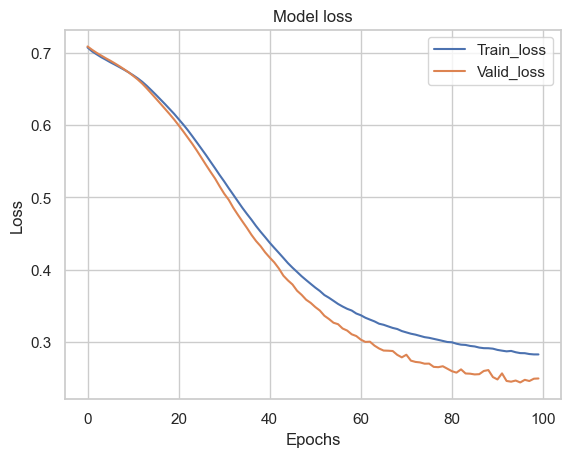

In [58]:
plt.plot(hist.history['loss'])  
# Plots the training loss values stored in `hist.history['loss']` over the epochs.

plt.plot(hist.history['val_loss'])  
# Plots the validation loss values stored in `hist.history['val_loss']` over the epochs.

plt.title('Model loss')  
# Sets the title of the plot to "Model loss" for clarity.

plt.ylabel('Loss')  
# Labels the y-axis as "Loss" to indicate the plotted values represent loss metrics.

plt.xlabel('Epochs')  
# Labels the x-axis as "Epochs" to indicate the number of training iterations.

plt.legend(['Train_loss', 'Valid_loss'], loc='upper right')  
# Adds a legend to differentiate between the training and validation loss curves.
# Places the legend in the upper right corner of the plot.

plt.show()  
# Displays the plot, showing the evolution of the training and validation loss over the epochs.

We can also visualize the training accuracy and the validation accuracy like this:

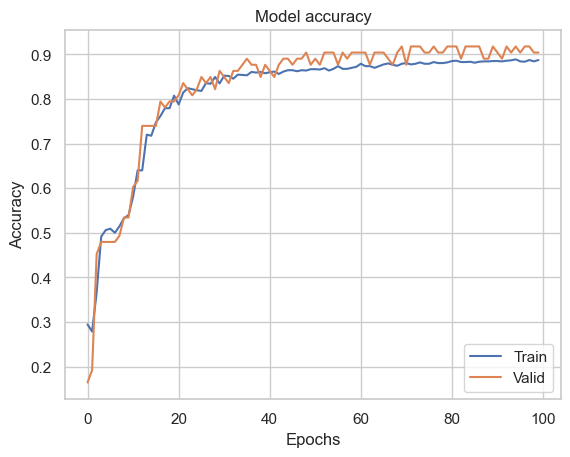

In [59]:
plt.plot(hist.history['accuracy'])  
# Plots the training accuracy values stored in `hist.history['accuracy']` over the epochs.

plt.plot(hist.history['val_accuracy'])  
# Plots the validation accuracy values stored in `hist.history['val_accuracy']` over the epochs.

plt.title('Model accuracy')  
# Sets the title of the plot to "Model accuracy" for clarity.

plt.ylabel('Accuracy')  
# Labels the y-axis as "Accuracy" to indicate the plotted values represent the model's accuracy.

plt.xlabel('Epochs')  
# Labels the x-axis as "Epochs" to represent the number of training iterations.

plt.legend(['Train', 'Valid'], loc='lower right')  
# Adds a legend to differentiate between the training and validation accuracy curves.
# Places the legend in the lower right corner of the plot.

plt.show()  
# Displays the plot, showing the evolution of the training and validation accuracy over the epochs.

---

## 4. Adding Regularization to our Neural Network

We'll train a bigger model which will overfit, which we call Model 2. This might take a few minutes.

In [60]:
model_2 = Sequential([  
    Dense(1000, activation='relu', input_shape=(10,)),  
    # Adds the first Dense (fully connected) layer with 1000 neurons and ReLU activation.  
    # The input shape is specified as 10, corresponding to the 10 features in the dataset.

    Dense(1000, activation='relu'),  
    # Adds a second Dense layer with 1000 neurons and ReLU activation.  
    # ReLU activation introduces non-linearity and helps the network learn complex patterns.

    Dense(1000, activation='relu'),  
    # Adds a third Dense layer with 1000 neurons and ReLU activation.

    Dense(1000, activation='relu'),  
    # Adds a fourth Dense layer with 1000 neurons and ReLU activation.

    Dense(1, activation='sigmoid'),  
    # Adds the output Dense layer with 1 neuron and a sigmoid activation function.  
    # Sigmoid activation outputs a probability value between 0 and 1, suitable for binary classification tasks.
])  

# using adaptative moment estimation (adam)

model_2.compile(optimizer='adam',  
                # Compiles the model using the Adam optimizer.  
                # Adam is an adaptive optimization algorithm that adjusts learning rates dynamically for each parameter.  

                loss='binary_crossentropy',  
                # Sets the loss function as binary cross-entropy, appropriate for binary classification problems.  
                # It measures the difference between predicted probabilities and true binary labels.

                metrics=['accuracy'])  
                # Specifies accuracy as the evaluation metric to monitor the model's performance during training and validation.  

hist_2 = model_2.fit(X_train, Y_train,  
                     # Trains the model using the training data (X_train, Y_train).  

                     batch_size=32,  
                     # Processes 32 samples per gradient update.  

                     epochs=100,  
                     # Runs 100 complete passes through the training dataset.  

                     validation_data=(X_val, Y_val))  
                     # Evaluates the model on validation data (X_val, Y_val) after each epoch to monitor its performance.

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7175 - loss: 0.5445 - val_accuracy: 0.8904 - val_loss: 0.3112
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8467 - loss: 0.3620 - val_accuracy: 0.9178 - val_loss: 0.2970
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8530 - loss: 0.3303 - val_accuracy: 0.9178 - val_loss: 0.2708
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8885 - loss: 0.2806 - val_accuracy: 0.9178 - val_loss: 0.2382
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8981 - loss: 0.2584 - val_accuracy: 0.9178 - val_loss: 0.2434
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8862 - loss: 0.2613 - val_accuracy: 0.9041 - val_loss: 0.2307
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9032 - loss: 0.2532 - val_accuracy: 0.9178 - val_loss: 0.1936
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9096 - loss: 0.2129 - val_accuracy: 0.9452 

Let's do the same visualization to see what overfitting looks like in terms of the loss and accuracy.

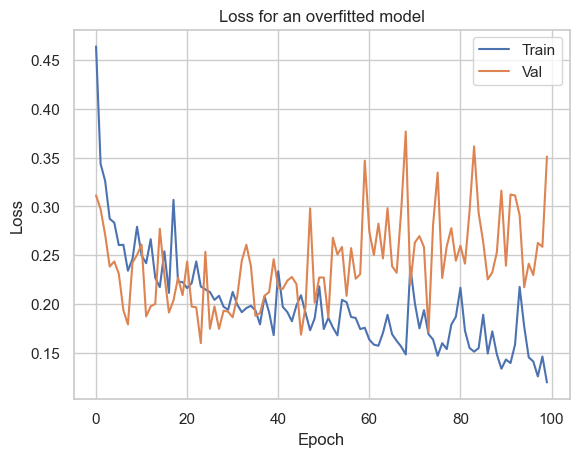

In [61]:
plt.plot(hist_2.history['loss'])  
# Plots the training loss values stored in `hist_2.history['loss']` over the epochs.

plt.plot(hist_2.history['val_loss'])  
# Plots the validation loss values stored in `hist_2.history['val_loss']` over the epochs.

plt.title('Loss for an overfitted model')  
# Sets the title of the plot to indicate that it visualizes the loss for a potentially overfitted model.

plt.ylabel('Loss')  
# Labels the y-axis as "Loss" to show the plotted values represent the loss metric.

plt.xlabel('Epoch')  
# Labels the x-axis as "Epoch" to indicate the training iterations over which the loss is plotted.

plt.legend(['Train', 'Val'], loc='upper right')  
# Adds a legend to differentiate between the training and validation loss curves.
# Places the legend in the upper right corner of the plot.

plt.show()  
# Displays the plot, allowing visualization of the training and validation loss trends.

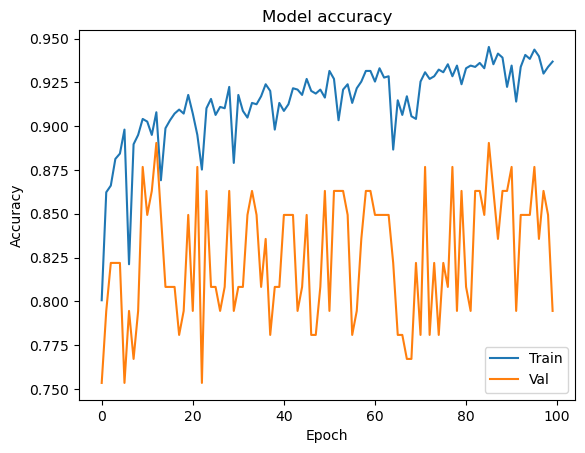

In [27]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3).

In [62]:
from keras.layers import Dropout  
# Imports the `Dropout` layer from the Keras library.
# Dropout is a regularization technique that randomly sets a fraction of input units to 0 during training, preventing overfitting and improving generalization.

from keras import regularizers  
# Imports the `regularizers` module from the Keras library.
# Regularizers apply penalties to the weights of the neural network (e.g., L1 or L2 regularization) during optimization, helping to reduce overfitting by encouraging smaller weights.

In [63]:
model_3 = Sequential([  
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),  
    # Adds a fully connected (Dense) layer with 1000 neurons and ReLU activation.  
    # Applies L2 regularization with a penalty factor of 0.01 to the weights to reduce overfitting.  
    # Specifies the input shape as 10 (matching the number of features in the dataset).  

    Dropout(0.5),  
    # Adds a Dropout layer that randomly sets 50% of the input units to 0 during training.  
    # Helps prevent overfitting by forcing the model to learn more robust features.  

    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    # Adds another Dense layer with 1000 neurons and ReLU activation, with L2 regularization.  

    Dropout(0.5),  
    # Adds another Dropout layer with 50% dropout.  

    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    # Adds a third Dense layer with 1000 neurons and ReLU activation, with L2 regularization.  

    Dropout(0.5),  
    # Adds a third Dropout layer with 50% dropout.  

    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    # Adds a fourth Dense layer with 1000 neurons and ReLU activation, with L2 regularization.  

    Dropout(0.5),  
    # Adds a fourth Dropout layer with 50% dropout.  

    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),  
    # Adds the output Dense layer with 1 neuron and sigmoid activation.  
    # Sigmoid activation outputs probabilities, suitable for binary classification.  
    # L2 regularization is applied to the output layer as well.  
])  

In [64]:
model_3.compile(optimizer='adam',  
                # Configures the model for training with the Adam optimizer.  
                # Adam is an adaptive optimization algorithm that adjusts learning rates dynamically for each parameter.  

                loss='binary_crossentropy',  
                # Sets the loss function to binary cross-entropy, which is suitable for binary classification tasks.  
                # It measures the difference between predicted probabilities and true binary labels (0 or 1).  

                metrics=['accuracy'])  
                # Specifies accuracy as the evaluation metric to monitor the model's performance during training and validation.  

hist_3 = model_3.fit(X_train, Y_train,  
                     # Trains the model using the training data (X_train, Y_train).  

                     batch_size=32,  
                     # Processes 32 samples per gradient update.  

                     epochs=100,  
                     # Runs 100 complete passes through the training dataset.  

                     validation_data=(X_val, Y_val))  
                     # Evaluates the model on the validation data (X_val, Y_val) after each epoch to monitor its performance.

Epoch 1/100


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5333 - loss: 19.2931 - val_accuracy: 0.7397 - val_loss: 2.0332
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7840 - loss: 1.3250 - val_accuracy: 0.8767 - val_loss: 0.5567
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8516 - loss: 0.5810 - val_accuracy: 0.8904 - val_loss: 0.4837
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8589 - loss: 0.5317 - val_accuracy: 0.9178 - val_loss: 0.4690
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8573 - loss: 0.5221 - val_accuracy: 0.9178 - val_loss: 0.4496
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8562 - loss: 0.5201 - val_accuracy: 0.8767 - val_loss: 0.4721
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8798 - loss: 0.4700 - val_accuracy: 0.9178 - val_loss: 0.4451
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8770 - loss: 0.4868 - val_accuracy: 0.9178 - val_

We'll now plot the loss and accuracy graphs for Model 3. You'll notice that the loss is a lot higher at the start, and that's because we've changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting

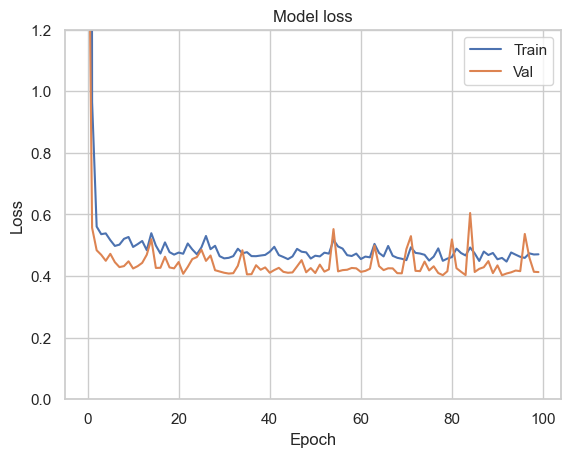

In [65]:
plt.plot(hist_3.history['loss'])  
# Plots the training loss values stored in `hist_3.history['loss']` over the epochs.

plt.plot(hist_3.history['val_loss'])  
# Plots the validation loss values stored in `hist_3.history['val_loss']` over the epochs.

plt.title('Model loss')  
# Sets the title of the plot to "Model loss" for clarity.

plt.ylabel('Loss')  
# Labels the y-axis as "Loss" to show the plotted values represent the loss metric.

plt.xlabel('Epoch')  
# Labels the x-axis as "Epoch" to indicate the number of training iterations.

plt.legend(['Train', 'Val'], loc='upper right')  
# Adds a legend to differentiate between the training and validation loss curves.
# Places the legend in the upper right corner of the plot.

plt.ylim(top=1.2, bottom=0)  
# Sets the limits for the y-axis. The top limit is 1.2, and the bottom limit is 0.
# This ensures the loss values are displayed within this range, improving readability.

plt.show()  
# Displays the plot, allowing visualization of the training and validation loss trends.

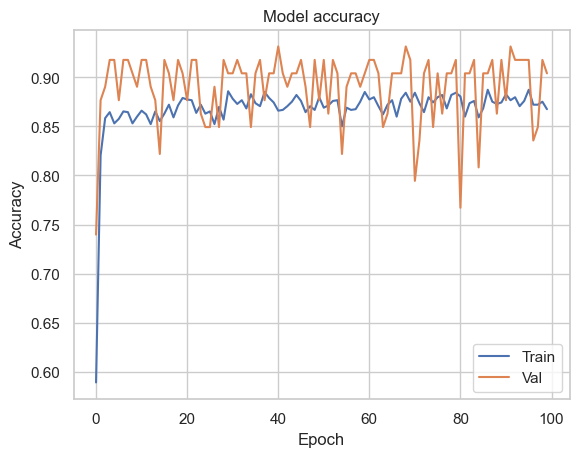

In [66]:
plt.plot(hist_3.history['accuracy'])  
# Plots the training accuracy values stored in `hist_3.history['accuracy']` over the epochs.

plt.plot(hist_3.history['val_accuracy'])  
# Plots the validation accuracy values stored in `hist_3.history['val_accuracy']` over the epochs.

plt.title('Model accuracy')  
# Sets the title of the plot to "Model accuracy" for clarity.

plt.ylabel('Accuracy')  
# Labels the y-axis as "Accuracy" to indicate that the plotted values represent the accuracy metric.

plt.xlabel('Epoch')  
# Labels the x-axis as "Epoch" to show the number of training iterations over which accuracy is measured.

plt.legend(['Train', 'Val'], loc='lower right')  
# Adds a legend to differentiate between the training and validation accuracy curves.
# Places the legend in the lower right corner of the plot.

plt.show()  
# Displays the plot, allowing visualization of the training and validation accuracy trends.

As compared to Model 2, you should see that there's less overfitting!

In [67]:
model_3v2 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    # Adds the first Dense layer with 1000 neurons and ReLU activation.
    # Applies L2 regularization with a penalty factor of 0.01 to prevent overfitting.
    # Specifies the input shape as 10 (corresponding to the 10 features in the dataset).

    Dropout(0.3),
    # Adds a Dropout layer that randomly sets 30% of the input units to 0 during training.
    # This reduces overfitting by forcing the model to learn more robust features.

    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    # Adds the second Dense layer with 1000 neurons and ReLU activation.
    # L2 regularization is applied to reduce the likelihood of overfitting.

    Dropout(0.3),
    # Adds another Dropout layer with a 30% dropout rate.

    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    # Adds the third Dense layer with 1000 neurons and ReLU activation.
    # Includes L2 regularization.

    Dropout(0.3),
    # Adds a third Dropout layer with a 30% dropout rate.

    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    # Adds the fourth Dense layer with 1000 neurons and ReLU activation.
    # Includes L2 regularization to limit overfitting.

    Dropout(0.3),
    # Adds a fourth Dropout layer with a 30% dropout rate.

    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
    # Adds the output Dense layer with 1 neuron and sigmoid activation.
    # The sigmoid activation outputs probabilities between 0 and 1, suitable for binary classification tasks.
    # L2 regularization is applied to the output layer as well.
])

In [68]:
model_3v2.compile(optimizer='adam',  
                # Configures the model for training with the Adam optimizer.  
                # Adam is an adaptive optimization algorithm that dynamically adjusts learning rates for each parameter.

                loss='binary_crossentropy',  
                # Sets the loss function to binary cross-entropy, which is suitable for binary classification tasks.  
                # Measures the difference between predicted probabilities and actual binary labels (0 or 1).

                metrics=['accuracy'])  
                # Specifies accuracy as the evaluation metric to monitor model performance during training and validation.  

hist_3v2 = model_3v2.fit(X_train, Y_train,  
                         # Trains the model using the training data (X_train, Y_train).

                         batch_size=32,  
                         # Specifies the number of samples per gradient update (32 samples in this case).

                         epochs=100,  
                         # Specifies the number of complete passes through the training data (100 epochs).  

                         validation_data=(X_val, Y_val))  
                         # Provides the validation data (X_val, Y_val) for evaluating the model after each epoch.

Epoch 1/100


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5696 - loss: 19.0979 - val_accuracy: 0.8356 - val_loss: 1.8985
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7504 - loss: 1.2957 - val_accuracy: 0.9041 - val_loss: 0.4798
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8481 - loss: 0.5533 - val_accuracy: 0.8630 - val_loss: 0.4949
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8928 - loss: 0.4768 - val_accuracy: 0.9041 - val_loss: 0.4308
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8667 - loss: 0.4854 - val_accuracy: 0.8219 - val_loss: 0.5087
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8430 - loss: 0.5658 - val_accuracy: 0.9041 - val_loss: 0.4277
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8684 - loss: 0.4790 - val_accuracy: 0.9041 - val_loss: 0.4067
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8743 - loss: 0.4604 - val_accuracy: 0.8493 - val_

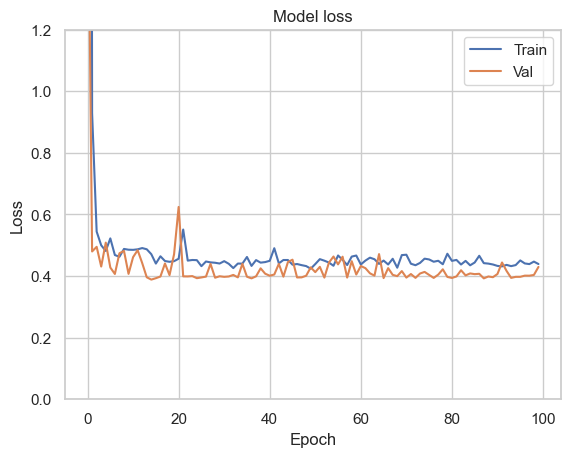

In [69]:
plt.plot(hist_3v2.history['loss'])  
# Plots the training loss values from the training process stored in `hist_3v2.history['loss']`.

plt.plot(hist_3v2.history['val_loss'])  
# Plots the validation loss values stored in `hist_3v2.history['val_loss']`.

plt.title('Model loss')  
# Sets the title of the plot to "Model loss" to clearly describe the content being visualized.

plt.ylabel('Loss')  
# Labels the y-axis as "Loss" to indicate the metric being plotted.

plt.xlabel('Epoch')  
# Labels the x-axis as "Epoch" to represent the training iterations over which loss was recorded.

plt.legend(['Train', 'Val'], loc='upper right')  
# Adds a legend to distinguish between the training and validation loss curves.
# Places the legend in the upper right corner of the plot.

plt.ylim(top=1.2, bottom=0)  
# Sets the y-axis range for the plot, with the top limit set to 1.2 and the bottom limit set to 0.
# Ensures consistent scaling of the loss values for better visualization.

plt.show()  
# Displays the plot, showing the trends in training and validation loss over the epochs.

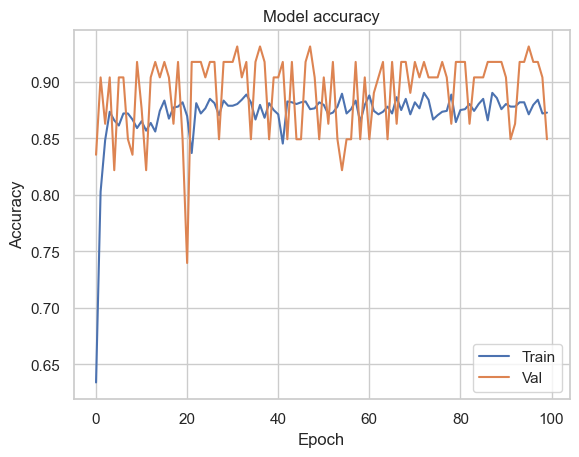

In [70]:
plt.plot(hist_3v2.history['accuracy'])  
# Plots the training accuracy values recorded during the training process, stored in `hist_3v2.history['accuracy']`.

plt.plot(hist_3v2.history['val_accuracy'])  
# Plots the validation accuracy values recorded during the training process, stored in `hist_3v2.history['val_accuracy']`.

plt.title('Model accuracy')  
# Sets the title of the plot to "Model accuracy" for clear identification.

plt.ylabel('Accuracy')  
# Labels the y-axis as "Accuracy" to indicate that the plotted values represent the model's accuracy.

plt.xlabel('Epoch')  
# Labels the x-axis as "Epoch" to show the number of training iterations over which accuracy was measured.

plt.legend(['Train', 'Val'], loc='lower right')  
# Adds a legend to differentiate between the training and validation accuracy curves.
# Places the legend in the lower right corner of the plot.

plt.show()  
# Displays the plot, providing a visualization of the training and validation accuracy trends over the epochs.

---

# Regression using Deep Learning 

### **Dataset Overview**

This dataset contains house sale prices for King County, including Seattle. It features data on homes sold between May 2014 and May 2015. The dataset consists of:
- 21 columns (features)
- 21,597 rows (samples)

**Feature Columns**

#### Identification and Temporal Data

- **id**: Unique identifier for each home sold.
- **date**: Date when the home was sold.

#### Price and Housing Characteristics

- **price**: Sale price of each home (target variable).
- **bedrooms**: Number of bedrooms.
- **bathrooms**: Number of bathrooms (e.g., 0.5 indicates a room with a toilet but no shower).
- **sqft_living**: Square footage of the apartment’s interior living space.
- **sqft_lot**: Square footage of the land lot.

#### Structure and Design

- **floors**: Number of floors in the house.
- **waterfront**: Dummy variable (1 if the property overlooks a waterfront; 0 otherwise).
- **view**: An index (0 to 4) representing the quality of the property’s view.
- **condition**: An index (1 to 5) describing the overall condition of the apartment (1 = Poor, 5 = Excellent).
- **grade**: An index (1 to 13) describing the quality of construction and design:
  - 1-3: Substandard construction and design.
  - 7: Average construction and design.
  - 11-13: High-quality construction and design.

#### Square Footage

- **sqft_above**: Square footage of the interior space above ground level.
- **sqft_basement**: Square footage of the interior space below ground level.

#### Age and Renovation

- **yr_built**: Year when the house was built.
- **yr_renovated**: Year when the house was last renovated.

#### Location

- **zipcode**: Zip code of the house’s location.
- **lat**: Latitude coordinate of the property.
- **long**: Longitude coordinate of the property.

#### Neighboring Property Features

- **sqft_living15**: Average square footage of interior living space for the nearest 15 neighbors.
- **sqft_lot15**: Average square footage of land lots for the nearest 15 neighbors.

### Purpose

This dataset is ideal for exploring housing market trends, building predictive models (e.g., regression models for price prediction), and analyzing real estate dynamics in King County.

---

### **Descripción del Conjunto de Datos**

Este conjunto de datos contiene los precios de venta de casas en el condado de King, incluyendo Seattle. Incluye datos de casas vendidas entre mayo de 2014 y mayo de 2015. El conjunto de datos consta de:
- 21 columnas (características)
- 21,597 filas (muestras)

**Columnas de Características**

#### Identificación y Datos Temporales

- **id**: Identificador único para cada casa vendida.
- **date**: Fecha en la que se vendió la casa.

#### Precio y Características de la Vivienda

- **price**: Precio de venta de cada casa (variable objetivo).
- **bedrooms**: Número de habitaciones.
- **bathrooms**: Número de baños (por ejemplo, 0.5 indica un baño con inodoro pero sin ducha).
- **sqft_living**: Metros cuadrados del espacio interior habitable del apartamento.
- **sqft_lot**: Metros cuadrados del terreno.

#### Estructura y Diseño

- **floors**: Número de pisos en la casa.
- **waterfront**: Variable dummy (1 si la propiedad tiene vista al agua; 0 en caso contrario).
- **view**: Índice (0 a 4) que representa la calidad de la vista de la propiedad.
- **condition**: Índice (1 a 5) que describe el estado general del apartamento (1 = Pobre, 5 = Excelente).
- **grade**: Índice (1 a 13) que describe la calidad de la construcción y el diseño:
  - 1-3: Construcción y diseño de baja calidad.
  - 7: Construcción y diseño de calidad promedio.
  - 11-13: Construcción y diseño de alta calidad.

#### Metros Cuadrados

- **sqft_above**: Metros cuadrados del espacio interior sobre el nivel del suelo.
- **sqft_basement**: Metros cuadrados del espacio interior por debajo del nivel del suelo.

#### Edad y Renovación

- **yr_built**: Año en que se construyó la casa.
- **yr_renovated**: Año de la última renovación de la casa.

#### Ubicación

- **zipcode**: Código postal de la ubicación de la casa.
- **lat**: Coordenada de latitud de la propiedad.
- **long**: Coordenada de longitud de la propiedad.

#### Características de Propiedades Vecinas

- **sqft_living15**: Promedio de metros cuadrados del espacio interior habitable de las 15 casas más cercanas.
- **sqft_lot15**: Promedio de metros cuadrados de los terrenos de las 15 casas más cercanas.

### Propósito

Este conjunto de datos es ideal para explorar tendencias en el mercado inmobiliario, construir modelos predictivos (por ejemplo, modelos de regresión para predecir precios) y analizar dinámicas del mercado inmobiliario en el condado de King.

---

## 0. Importacion de librerias utilizadas

In [43]:
# Data Analysis and Manipulation
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical operations and array manipulation

# Visualization
import seaborn as sns             # For statistical data visualization
import matplotlib.pyplot as plt   # For general plotting
%matplotlib inline  

# Preprocessing
from sklearn.preprocessing import MinMaxScaler   # For scaling data to a range (0, 1)
from sklearn.preprocessing import StandardScaler # For standardizing features (mean=0, std=1)
from sklearn import preprocessing                # For additional preprocessing utilities

# Data Splitting
from sklearn.model_selection import train_test_split  # For splitting datasets into training and testing subsets

# Deep Learning Model Building
from keras.models import Sequential                # For creating a linear stack of layers
from keras.layers import Dense, Activation         # For defining fully connected layers and activation functions
from keras import layers, preprocessing, regularizers # For additional layer options, preprocessing, and regularization
from tensorflow.keras.optimizers import Adam       # For adaptive optimization (alternative if not found in Keras)

# Evaluation Metrics
from sklearn.metrics import (mean_squared_error,   # For regression error evaluation
                             mean_absolute_error,  # For mean absolute regression error
                             explained_variance_score, # For regression variance explanation
                             classification_report,    # For classification performance summary
                             confusion_matrix)         # For confusion matrix in classification tasks

from keras.callbacks import EarlyStopping

## 1. Exploracion y procesamiento de los datos

In [45]:
housePrices = pd.read_excel('Files/kc_house_data_yr.xlsx')  
# Reads the Excel file 'kc_house_data_yr.xlsx' from the 'Files' directory and loads it into a pandas DataFrame named 'housePrices'.  

print(len(housePrices))  
# Prints the number of rows in the 'housePrices' DataFrame, which corresponds to the total number of samples (houses) in the dataset.  

# Preview the data from the top
housePrices.head()  
# Displays the first 5 rows of the 'housePrices' DataFrame.
# Useful for quickly inspecting the structure and content of the dataset.

21613


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [46]:
housePrices.tail()  
# Displays the last 5 rows of the 'housePrices' DataFrame.
# Useful for inspecting the structure and content of the dataset from the end.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [47]:
housePrices.shape  
# Returns a tuple representing the dimensions of the 'housePrices' DataFrame.
# The first value is the number of rows (samples), and the second value is the number of columns (features).
# Useful for quickly understanding the size of the dataset.

(21613, 21)

In [49]:
len(housePrices.columns)  
# Returns the number of columns (features) in the 'housePrices' DataFrame.
# Useful for determining the total number of features in the dataset.

21

In [50]:
housePrices.dtypes  
# Displays the data types of each column in the 'housePrices' DataFrame.
# Useful for identifying the type of data stored in each column (e.g., integers, floats, or objects).
# Columns with 'object' data type often represent strings or categorical data.

id                 int64
date               int64
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
housePrices.info()  
# Provides a concise summary of the 'housePrices' DataFrame, including:
# - The number of non-null entries for each column.
# - The data type of each column.
# - The total number of entries (rows) in the dataset.
# Useful for assessing the completeness and structure of the dataset, identifying missing values, and understanding column data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  int64  
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Which features contain blank, null or empty values?

We can check for missing values with pandas isnull(). This indicates whether values are missing or not. Then we can sum all the values to check every column.

In [52]:
# Number of null values per feature
housePrices.isnull().sum()  
# Checks for missing (null) values in the 'housePrices' DataFrame.
# - `isnull()`: Identifies all null values in the DataFrame.
# - `sum()`: Sums up the total null values for each column (feature).
# This provides an overview of which features have missing data and how many missing entries exist per feature.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

What is the distribution of numerical feature values across the samples?

In [53]:
housePrices.describe().transpose()  
# Generates summary statistics for numerical columns in the 'housePrices' DataFrame and transposes the result for better readability.
# - `describe()`: Provides statistics like mean, standard deviation, min, max, and quartiles for each numerical feature.
# - `transpose()`: Swaps rows and columns in the output to display features as rows and statistics as columns.
# This is useful for quickly understanding the distribution and range of values for each numerical feature in the dataset.

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
date,21613.0,2.014390e+07,4.436582e+03,2.014050e+07,2.014072e+07,2.014102e+07,2.015022e+07,2.015053e+07
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00


__Completing__

Since there are no missing values we do not need to complete any values.

__Preparation__

Id feature may be dropped from our analysis since it does not add value. Date feature may be dropped since we are going to do feature engineering and make a year and month column. Zipcode feature is a special case, we could use it, but since we do not know exactly the zones of King County we are just going to drop it. Treat strings as categories. Although Zip code is numeric, we cannot treat it as a number in the model, it may be converted to a string.

__Creating__

We may want to create a new feature called Year based on Date to analyze the price change throughout the years. We may want to create a new feature called Month based on Date to analyze the price change throughout the months.

__Correlation__

We want to know how well does each feature correlate with Price. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

Analyze by visualizing data using the __Pearson correlation matrix__

It plots a coefficient to examine the strength and direction of the linear relationship between two continuous variables.

The correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables. For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables.

The sign of the coefficient indicates the direction of the relationship. If both variables tend to increase or decrease together, the coefficient is positive, and the line that represents the correlation slopes upward. If one variable tends to increase as the other decreases, the coefficient is negative, and the line that represents the correlation slopes downward.

<Axes: title={'center': 'Pearson Correlation Matrix'}>

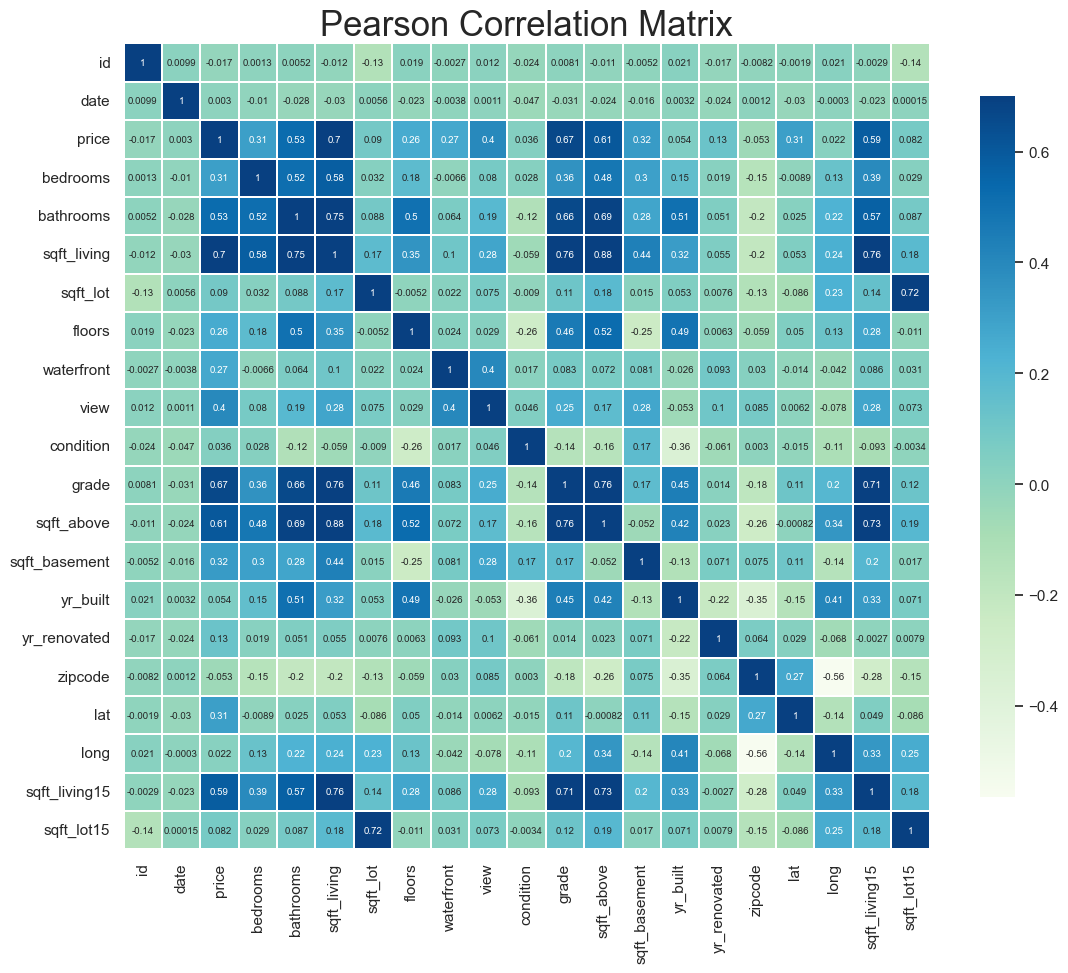

In [54]:
sns.set(style='whitegrid', font_scale=1)  
# Sets the style and font scale for seaborn plots.
# - `style='whitegrid'`: Adds a grid background to the plots for better visualization.
# - `font_scale=1`: Sets the default font size for the plot elements.

plt.figure(figsize=(13,13))  
# Creates a new figure with a specified size of 13x13 inches for the heatmap.

plt.title('Pearson Correlation Matrix', fontsize=25)  
# Adds a title to the heatmap with the text "Pearson Correlation Matrix" and sets the font size to 25.

sns.heatmap(housePrices.corr(),  
            # Creates a heatmap to visualize the correlation matrix of the 'housePrices' DataFrame.
            # `housePrices.corr()`: Computes the Pearson correlation coefficients for numerical features.

            linewidths=0.25,      # Sets the width of the lines between cells in the heatmap.
            vmax=0.7,             # Sets the maximum value for the color bar to 0.7.
            square=True,          # Ensures the cells in the heatmap are square-shaped.
            cmap='GnBu',          # Sets the color palette to 'GnBu' (green to blue gradient).
            linecolor='w',        # Sets the color of the lines between cells to white.
            annot=True,           # Displays the correlation values inside each cell.
            annot_kws={'size':7}, # Sets the font size for the annotation text to 7.
            cbar_kws={'shrink': .7})  # Shrinks the color bar to 70% of its original size.

Which features are more correlated to the price?

This allow us to explore labels that are highly correlated to the price.
sqft_living looks like a highly correlated label to the price, as well as grade, sqft_above, sqft_living15 and bathrooms.

In [55]:
price_corr = housePrices.corr()['price'].sort_values(ascending=False)  
# Calculates the Pearson correlation coefficients between the 'price' column and all other numerical columns in the 'housePrices' DataFrame.
# - `housePrices.corr()`: Computes the correlation matrix for all numerical features.
# - `['price']`: Selects the correlations specifically with the 'price' column.
# - `sort_values(ascending=False)`: Sorts the correlations in descending order to show the strongest positive correlations at the top.

print(price_corr)  
# Prints the sorted correlation values, showing how strongly each feature is linearly related to 'price'.

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date             0.003033
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


__Price feature__

Most of the house prices are between 0 and 1,500,000.

The average house price is $540,000.

Keep in mind that it may be a good idea to drop extreme values. For instance, we could focus on house from 0 to $3,000,000 and 
drop the other ones.

It seems that there is a positive linear relationship between the price and sqft_living.

An increase in living space generally corresponds to an increase in house price.

/Users/pipepatino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


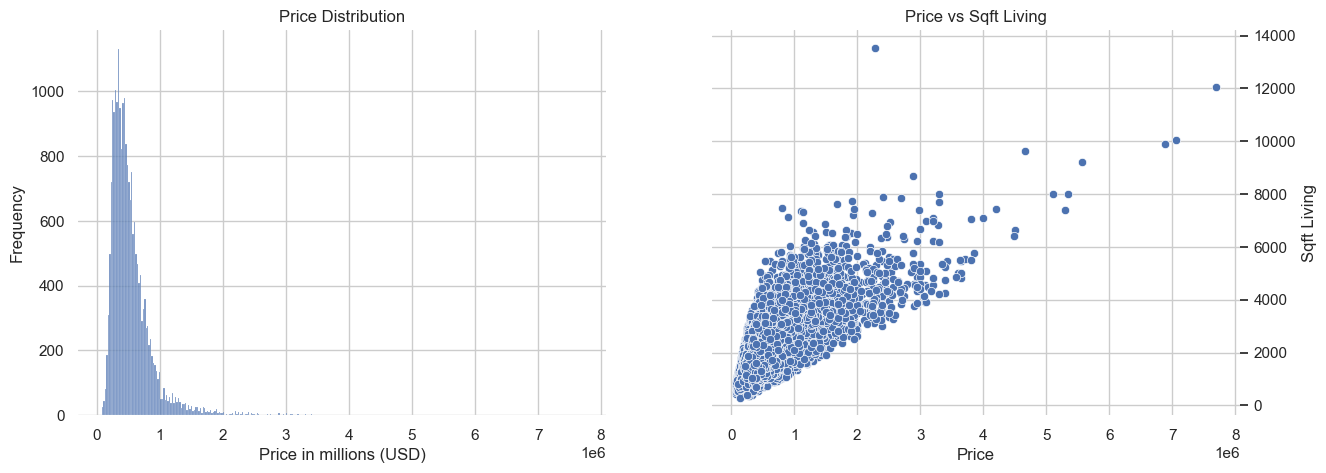

In [56]:
f, axes = plt.subplots(1, 2, figsize=(15,5))  
# Creates a figure with 1 row and 2 columns of subplots, with an overall size of 15x5 inches.
# The variable `axes` holds references to the individual subplots.

sns.histplot(housePrices['price'], ax=axes[0])  
# Plots a histogram of the 'price' column on the first subplot (axes[0]).
# Displays the distribution of house prices.

sns.scatterplot(x='price', y='sqft_living', data=housePrices, ax=axes[1])  
# Plots a scatter plot of 'price' vs. 'sqft_living' on the second subplot (axes[1]).
# Displays the relationship between house prices and square footage of living space.

sns.despine(bottom=True, left=True)  
# Removes the bottom and left spines (lines surrounding the plot area) for a cleaner visual style.

axes[0].set(xlabel='Price in millions (USD)', ylabel='Frequency', title='Price Distribution')  
# Sets the x-axis label, y-axis label, and title for the histogram subplot (axes[0]).

axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Sqft Living')  
# Sets the x-axis label, y-axis label, and title for the scatter plot subplot (axes[1]).

axes[1].yaxis.set_label_position("right")  
# Moves the y-axis label of the scatter plot to the right side.

axes[1].yaxis.tick_right()  
# Moves the y-axis tick marks of the scatter plot to the right side.

__Bedrooms and floors box plots__

Box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot. Outliers may be plotted as individual points. The spacings between the different parts of the box indicate the degree of dispersion (spread).

We can see outliers plotted as individual points; this probably are the more expensive houses.
We can see that the price tends to go up when the house has more bedrooms.

[Text(0.5, 0, 'Floors'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Floors vs Price Box Plot')]

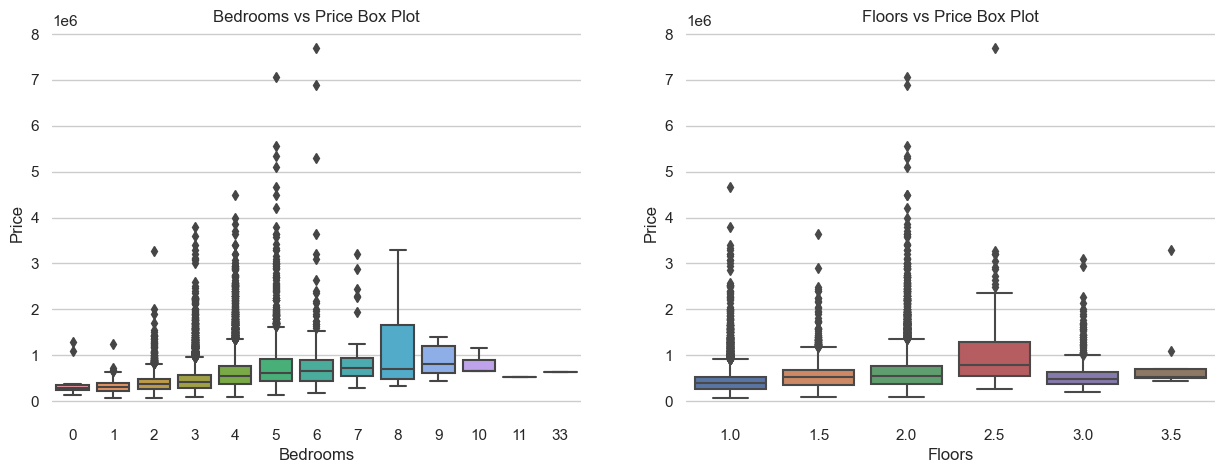

In [57]:
sns.set(style="whitegrid", font_scale=1)  
# Sets the style of the seaborn plots to "whitegrid" for a clean grid-based background.
# Adjusts the font scale to 1 for readability.

f, axes = plt.subplots(1, 2, figsize=(15,5))  
# Creates a figure with 1 row and 2 columns of subplots, each with a size of 15x5 inches.

sns.boxplot(x=housePrices['bedrooms'], y=housePrices['price'], ax=axes[0])  
# Creates a box plot on the first subplot (axes[0]) to visualize the distribution of prices across different numbers of bedrooms.

sns.boxplot(x=housePrices['floors'], y=housePrices['price'], ax=axes[1])  
# Creates a box plot on the second subplot (axes[1]) to visualize the distribution of prices across different numbers of floors.

sns.despine(bottom=True, left=True)  
# Removes the bottom and left spines (lines around the plot) for a cleaner look.

axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')  
# Sets the x-axis label, y-axis label, and title for the first box plot (axes[0]).

axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price Box Plot')  
# Sets the x-axis label, y-axis label, and title for the second box plot (axes[1]).

__Waterfront, view and grade box plots__

Waterfront houses tends to have a better price value.
The price of waterfront houses tends to be more disperse and the price of houses without waterfront tend to be more concentrated.
Grade and waterfront effect price. View seem to effect less but it also has an effect on price.

[Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Grade vs Price Box Plot')]

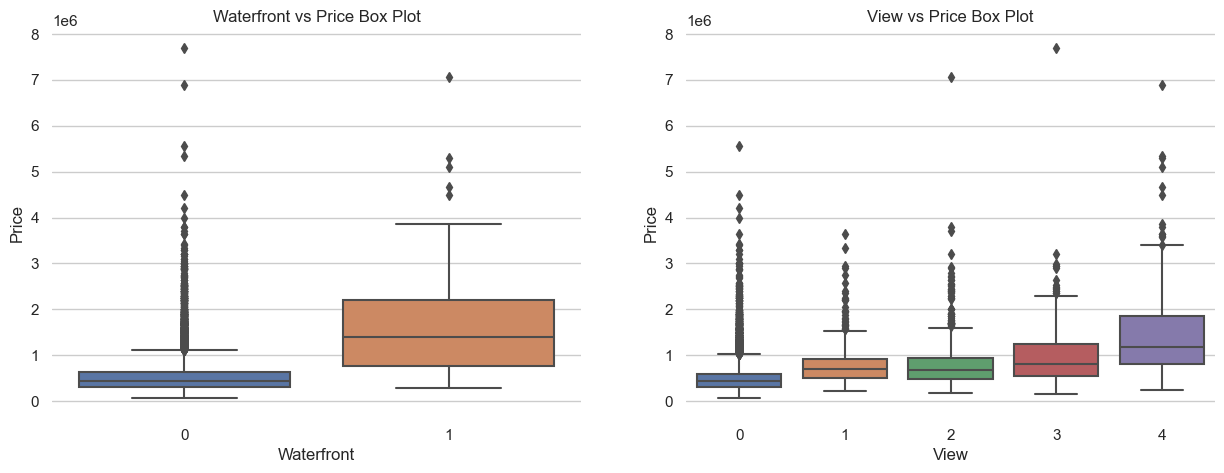

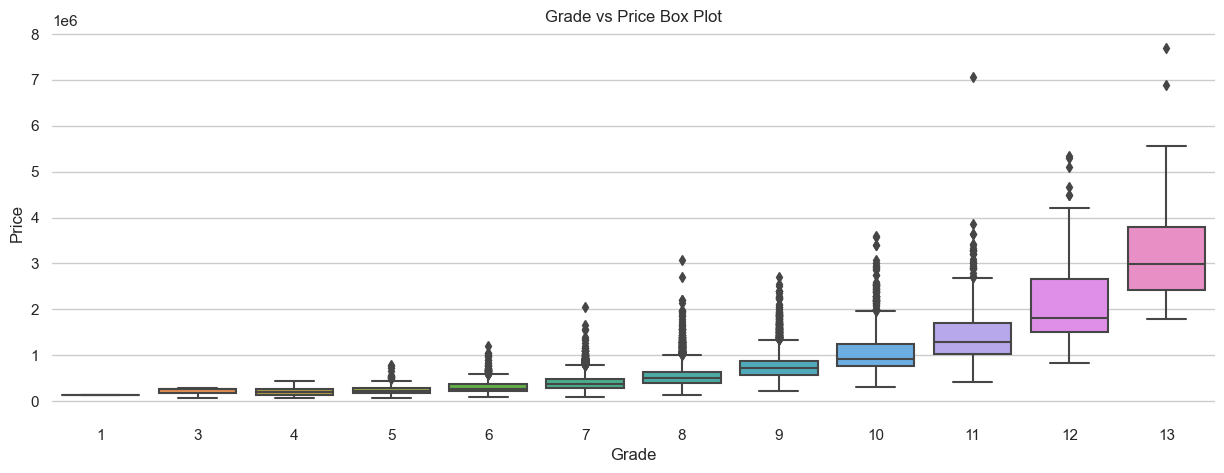

In [58]:
# Create a figure with two subplots for the first set of box plots
f, axes = plt.subplots(1, 2, figsize=(15,5))  

sns.boxplot(x=housePrices['waterfront'], y=housePrices['price'], ax=axes[0])  
# Creates a box plot on the first subplot (axes[0]) to show how house prices vary based on waterfront properties (1 = waterfront, 0 = no waterfront).

sns.boxplot(x=housePrices['view'], y=housePrices['price'], ax=axes[1])  
# Creates a box plot on the second subplot (axes[1]) to show how house prices vary based on the view rating (index 0-4).

sns.despine(left=True, bottom=True)  
# Removes the left and bottom spines (lines around the plots) for a cleaner look.

axes[0].set(xlabel='Waterfront', ylabel='Price', title='Waterfront vs Price Box Plot')  
# Sets the x-axis label, y-axis label, and title for the first box plot (axes[0]).

axes[1].set(xlabel='View', ylabel='Price', title='View vs Price Box Plot')  
# Sets the x-axis label, y-axis label, and title for the second box plot (axes[1]).

# Create a figure with one subplot for the grade vs price box plot
f, axe = plt.subplots(1, 1, figsize=(15,5))  

sns.boxplot(x=housePrices['grade'], y=housePrices['price'], ax=axe)  
# Creates a box plot to visualize how house prices vary based on the grade of construction and design (index 1-13).

sns.despine(left=True, bottom=True)  
# Removes the left and bottom spines for this plot.

axe.set(xlabel='Grade', ylabel='Price', title='Grade vs Price Box Plot')  
# Sets the x-axis label, y-axis label, and title for the grade vs price box plot.

In [59]:
[housePrices['view'].unique().tolist() for view in housePrices.columns]
# This line attempts to create a list comprehension to iterate over all column names in 'housePrices.columns'.
# For each column name ('view' variable), it accesses the unique values in the 'view' column and converts them to a list using `.unique().tolist()`.
# However, this logic is flawed because it redundantly accesses 'housePrices["view"]' for every column in 'housePrices.columns'.
# The result would be a repeated list of unique values from the 'view' column, as many times as there are columns in the DataFrame.

[[0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1],
 [0, 3, 4, 2, 1]]

__Working with Feature Data = Feature engineering__

__Correcting by dropping features__

By dropping features, we are dealing with fewer data points. Speeds up our notebook and eases the analysis. Based on our assumptions and decisions we want to drop the Id, zipcode and Date features.

In [60]:
housePrices = housePrices.drop('id', axis=1)  
# Removes the 'id' column from the 'housePrices' DataFrame.
# - `axis=1` specifies that the operation is performed on columns.
# The 'id' column is typically a unique identifier and not relevant for analysis or modeling.

housePrices = housePrices.drop('zipcode', axis=1)  
# Removes the 'zipcode' column from the 'housePrices' DataFrame.
# - `axis=1` ensures the operation is performed on columns.
# The 'zipcode' column may be excluded if it is not directly useful for analysis or modeling.

print(housePrices.columns.values)  
# Prints the remaining column names in the 'housePrices' DataFrame after dropping the 'id' and 'zipcode' columns.
# This helps verify which features are still part of the dataset.

['date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15']


We want to engineer the date feature to make a year and month column. The feature date is as a string. With pd.to_datetime we can convert an argument to datetime.

In [61]:
housePrices.info()  
# Provides a concise summary of the 'housePrices' DataFrame, including:
# - The number of rows and columns.
# - The column names and their data types (e.g., int64, float64, object).
# - The number of non-null (non-missing) entries for each column.
# Useful for understanding the structure, completeness, and types of data in the dataset, helping to identify potential issues like missing values or incorrect data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  int64  
 1   price          21613 non-null  int64  
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [62]:
housePrices['date'] = housePrices['date'].values.astype(str)  
# Converts the values in the 'date' column of the 'housePrices' DataFrame to strings.
# - `.values` extracts the underlying NumPy array from the column.
# - `.astype(str)` casts the array elements to string type.
# This operation ensures that the 'date' column is treated as string data, which might be necessary for parsing, formatting, or textual operations.

In [63]:
housePrices.info()  
# Displays a concise summary of the 'housePrices' DataFrame after recent transformations.
# - Shows the total number of rows and columns.
# - Lists each column with its data type (e.g., int64, float64, object).
# - Displays the count of non-null entries for each column, helping to identify missing data.
# This helps verify the structure and data types of the updated DataFrame, ensuring transformations (like converting 'date' to string) were applied correctly.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  int64  
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [64]:
housePrices['date'] = pd.to_datetime(housePrices['date'])  
# Converts the 'date' column from string format to pandas datetime objects.
# This ensures that date-related operations (like extracting month or year) can be performed efficiently.

housePrices['month'] = housePrices['date'].apply(lambda date: date.month)  
# Extracts the month from each datetime object in the 'date' column.
# Creates a new column 'month' with numeric values representing the month (1 = January, ..., 12 = December).

housePrices['year'] = housePrices['date'].apply(lambda date: date.year)  
# Extracts the year from each datetime object in the 'date' column.
# Creates a new column 'year' with numeric values representing the year.

housePrices = housePrices.drop('date', axis=1)  
# Removes the original 'date' column from the DataFrame, as it is no longer needed after extracting the month and year.

# Check the new columns
print(housePrices.columns.values)  
# Prints the names of all columns in the updated DataFrame.
# This is used to confirm that 'month' and 'year' were successfully added and 'date' was removed.

['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


In [65]:
print('Now the dataframe looks like this:')  
# Prints a message indicating that the structure of the DataFrame is being displayed.

housePrices.head(5)  
# Displays the first 5 rows of the 'housePrices' DataFrame.
# Useful for verifying the recent changes, such as the addition of 'month' and 'year' columns and the removal of the 'date' column.

Now the dataframe looks like this:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


__House price trends, Price vs month, vs year__

Looking the box plots we notice that there is not a big difference between 2014 and 2015.
The number of houses sold by month tends to be similar every month.
The line plot show that around April there is an increase in house prices.

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Price'), Text(0.5, 1.0, 'Price Trends')]

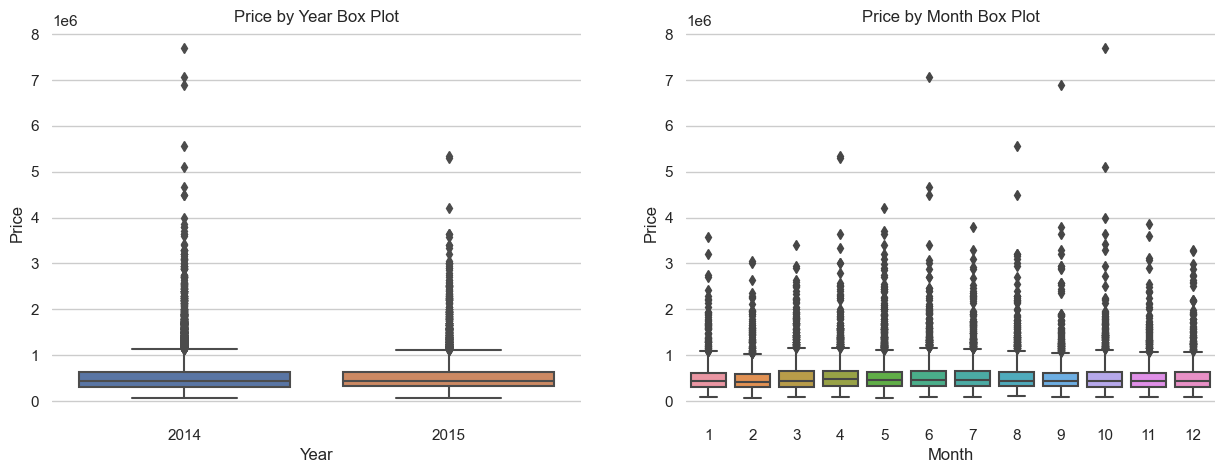

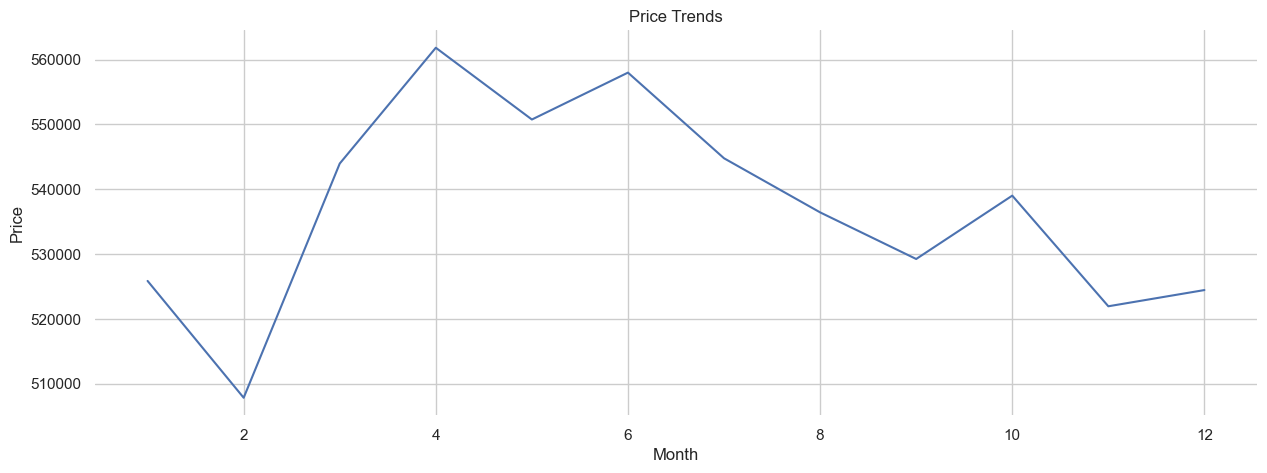

In [66]:
f, axes = plt.subplots(1, 2, figsize=(15,5))  
# Creates a figure with 1 row and 2 columns of subplots, with a total size of 15x5 inches.

sns.boxplot(x='year', y='price', data=housePrices, ax=axes[0])  
# Creates a box plot on the first subplot (axes[0]) to show how house prices vary by year.
# Useful for identifying trends in price over time.

sns.boxplot(x='month', y='price', data=housePrices, ax=axes[1])  
# Creates a box plot on the second subplot (axes[1]) to show how house prices vary by month.
# Helps identify seasonal patterns or variations in pricing.

sns.despine(left=True, bottom=True)  
# Removes the left and bottom spines (lines around the plots) for a cleaner look.

axes[0].set(xlabel='Year', ylabel='Price', title='Price by Year Box Plot')  
# Sets the x-axis label, y-axis label, and title for the first box plot (axes[0]).

axes[1].set(xlabel='Month', ylabel='Price', title='Price by Month Box Plot')  
# Sets the x-axis label, y-axis label, and title for the second box plot (axes[1]).

# Create a new figure for the line plot
f, axe = plt.subplots(1, 1, figsize=(15,5))  

housePrices.groupby('month').mean()['price'].plot()  
# Groups the DataFrame by the 'month' column and calculates the mean price for each month.
# Plots the average price for each month to show seasonal trends.

sns.despine(left=True, bottom=True)  
# Removes the left and bottom spines for the line plot.

axe.set(xlabel='Month', ylabel='Price', title='Price Trends')  
# Sets the x-axis label, y-axis label, and title for the line plot.

__Splitting data into training, validation and testing sets__

Instead of a class, Regression problems are measured by a `mean squared error or "MSE"`

Again, in supervised learning, we are training our model with a given dataset of examples f(X) = y, where X are a set of variables, y is the value to predict and f is the DNN !

In [67]:
# Features
X = housePrices.drop('price', axis=1)  
# Removes the 'price' column from the DataFrame and assigns the remaining columns to `X`.
# `X` represents the feature set, which includes all independent variables used for modeling.

# Label
y = housePrices['price']  
# Extracts the 'price' column from the DataFrame and assigns it to `y`.
# `y` is the target variable (dependent variable) that the model will predict.

# Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=101)  
# Splits the feature set (`X`) and target variable (`y`) into training and validation subsets:
# - `test_size=0.3`: Allocates 30% of the data for validation and 70% for training.
# - `random_state=101`: Ensures reproducibility by setting a random seed.
# - `X_train`, `y_train`: Features and target for the training set.
# - `X_valid`, `y_valid`: Features and target for the validation set.

In [68]:
print(X_train.shape)  
# Prints the shape of the training feature set `X_train`.
# It shows the number of rows (samples) and columns (features) in the training data.

print(X_valid.shape)  
# Prints the shape of the validation feature set `X_valid`.
# It displays the number of rows (samples) and columns (features) in the validation data.

print(y_train.shape)  
# Prints the shape of the training target set `y_train`.
# It shows the number of rows (samples) in the training labels.

print(y_valid.shape)  
# Prints the shape of the validation target set `y_valid`.
# It shows the number of rows (samples) in the validation labels.

(15129, 19)
(6484, 19)
(15129,)
(6484,)


__Scaling Data__

In Machine Learning, including Deep Learning, Gaussian distributions are the key, so adjusting data to gaussian is kean
Even more, having a standard deviation of 1 and median of 0 is ideal.

fit_transform(X[, y]): Fit to data, then transform it.
transform(X): Scale features of X according to feature_range.


In [69]:
scaler = MinMaxScaler()  
# Initializes a MinMaxScaler object to scale features to a range between 0 and 1.

# Fit and transform
X_train = scaler.fit_transform(X_train)  
# Fits the MinMaxScaler on the training data and scales it.
# The `fit` step calculates the minimum and maximum values for each feature in `X_train`.
# The `transform` step applies the scaling to the training data.

# Transform for avoiding data leakage
X_valid = scaler.transform(X_valid)  
# Scales the validation data using the previously computed minimum and maximum values from the training set.
# This avoids data leakage by ensuring that the validation data does not influence the scaling parameters.

# Everything has been scaled between 1 and 0
print('Max: ', X_train.max())  
# Prints the maximum value in the scaled training data, which should be 1.

print('Min: ', X_train.min())  
# Prints the minimum value in the scaled training data, which should be 0.

Max:  1.0000000000000002
Min:  0.0


## 2. Consturccion y entrenamiento de la red neuronal

__Creating a model == The f, the DNN__

We estimate the number of neurons (units) from our features. Ex: X_train.shape (15129, 19). The optimizer is asking how you want to perform this gradient descent. In this case we are using the Adam optimizer and the mean square error loss function.

In [70]:
model = Sequential()  
# Initializes a Sequential model, which allows stacking layers in a linear order.

# Input layer
model.add(Dense(19, activation='relu'))  
# Adds the input layer with 19 neurons (corresponding to the number of features in the dataset after scaling).
# Uses the ReLU activation function to introduce non-linearity.

# Hidden layers
model.add(Dense(19, activation='relu'))  
# Adds the first hidden layer with 19 neurons and ReLU activation.

model.add(Dense(19, activation='relu'))  
# Adds the second hidden layer with 19 neurons and ReLU activation.

model.add(Dense(19, activation='relu'))  
# Adds the third hidden layer with 19 neurons and ReLU activation.

# Output layer
model.add(Dense(1))  
# Adds the output layer with 1 neuron.
# This layer outputs a single value, suitable for regression tasks (e.g., predicting price).

model.compile(optimizer='adam', loss='mse')  
# Configures the model for training.
# - `optimizer='adam'`: Uses the Adam optimizer, an adaptive optimization algorithm that adjusts learning rates.
# - `loss='mse'`: Sets the loss function to Mean Squared Error (MSE), which is suitable for regression problems.

__Training the model, the f, the DNN__

Now that the model, architecture, 'stomach' is ready, we can fit the model into the data.

Since the dataset is large, we are going to use batch_size. It is typical to use batches of the power of 2 (32, 64, 128, 256...). In this case we are using 128. The smaller the batch size, the longer is going to take.


In [71]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',            # Monitors the validation loss during training.
    patience=10,                   # Stops training if validation loss does not improve for 10 consecutive epochs.
    restore_best_weights=True      # Restores the model's weights from the epoch with the best validation loss.
)

# Train the model with EarlyStopping
model.fit(x=X_train,               # Feature set for training.
          y=y_train.values,        # Target values for training.
          validation_data=(X_valid, y_valid.values),  # Validation dataset (features and targets).
          batch_size=128,          # Number of samples per gradient update.
          epochs=400,              # Maximum number of training epochs.
          callbacks=[early_stopping])  # Includes the EarlyStopping callback to terminate training early if needed.

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 412554395648.0000 - val_loss: 433039572992.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 426464772096.0000 - val_loss: 431098396672.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 415907774464.0000 - val_loss: 411745222656.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 374729474048.0000 - val_loss: 333267042304.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 295102939136.0000 - val_loss: 185724731392.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 147864272896.0000 - val_loss: 108953845760.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 94331396096.0000 - val_loss: 103408623616.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 91662598144.0000 - val_loss: 101717598208.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 94373240832.0000 - val_loss: 100000768000.0000
Epoch 10

## 3. Visualizacion de metricas de evaluacion

__Training loss per epoch__

This plot shows the training loss per epoch.
This plot helps us to see if there is overfitting in the model. In this case there is no overfitting because both lines go down at the same time.

/Users/pipepatino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pipepatino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


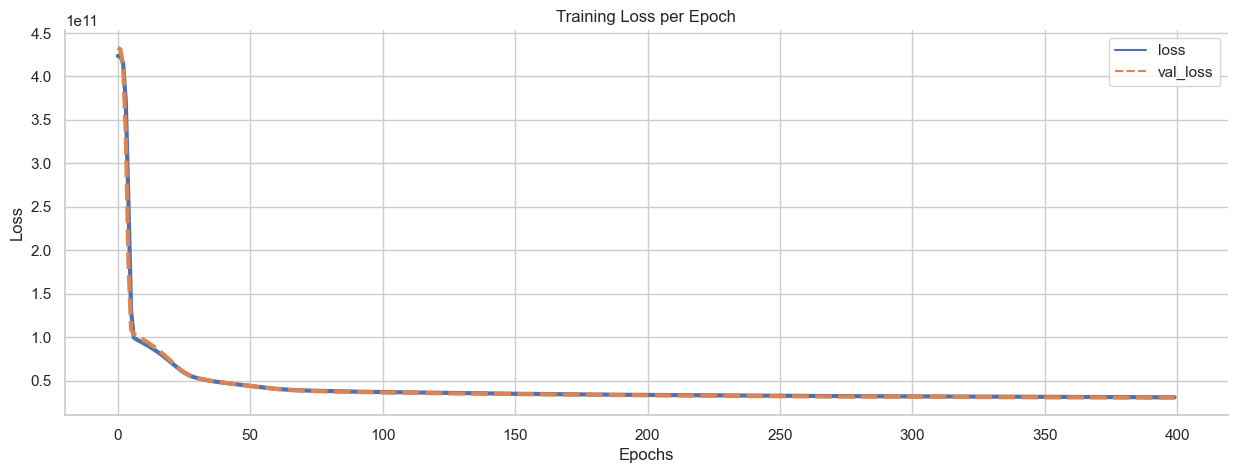

In [72]:
losses = pd.DataFrame(model.history.history)  
# Converts the training history (`model.history.history`) into a pandas DataFrame.
# The DataFrame contains the training and validation loss values recorded at each epoch.

plt.figure(figsize=(15,5))  
# Creates a new figure with a specified size of 15x5 inches for the plot.

sns.lineplot(data=losses, lw=3)  
# Plots the training and validation loss values using seaborn's `lineplot` function.
# - `data=losses`: Specifies the DataFrame containing loss data for plotting.
# - `lw=3`: Sets the line width to 3 for better visibility.

plt.xlabel('Epochs')  
# Sets the label for the x-axis to "Epochs", representing the training iterations.

plt.ylabel('Loss')  
# Sets the label for the y-axis to "Loss", representing the loss values.

plt.title('Training Loss per Epoch')  
# Sets the title of the plot to describe its content.

sns.despine()  
# Removes the top and right spines (borders) of the plot for a cleaner appearance.

__Regression Evaluation Metrics__

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

n∑i=1/n|yi−y^i|
 
Mean Squared Error (MSE) is the mean of the squared errors:

n∑i=1/n(yi−y^i)2
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

n∑i=1 √1/n(yi−y^i)2
 

__Comparing these metrics__

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

__Prediction (What we do on brand new data)__

In this part we are giving the model the test set to get a list of predictions. Then we compare the correct values with the list of predictions. We use different metrics to compare the predictions, in this case we use MAE, MSE, RMSE and Variance Regression Score.

Let us start by analyzing the MAE, which is 103,500. This means that our model is off on average about `$100,000`.

Is that MAE good or bad?

For that we must take into account our original data set and see what kind of values we have. For instance, the mean is 540,000, therefore the MEA is about 19% of the mean price. This is not a particularly good result.

To better understand this error, we can use the variance regression score, where the best possible score is 1.0 and lower values are worse. This tells you how much variance is being explain by your model. In our case we have 0.80 which is a normal result.

In [73]:
# Predictions on the test set
predictions = model.predict(X_valid)  
# Uses the trained model to predict the target values (`price`) for the validation set (`X_valid`).
# The result is stored in the `predictions` array.

print('MAE: ', mean_absolute_error(y_valid, predictions))  
# Calculates and prints the Mean Absolute Error (MAE), which measures the average absolute difference between predicted and actual values.
# Lower MAE indicates better predictive accuracy.

print('MSE: ', mean_squared_error(y_valid, predictions))  
# Calculates and prints the Mean Squared Error (MSE), which measures the average squared difference between predicted and actual values.
# MSE gives more weight to large errors and is useful for penalizing significant deviations.

print('RMSE: ', np.sqrt(mean_squared_error(y_valid, predictions)))  
# Calculates and prints the Root Mean Squared Error (RMSE), which is the square root of MSE.
# RMSE provides error in the same units as the target variable (`price`).

print('Variance Regression Score: ', explained_variance_score(y_valid, predictions))  
# Calculates and prints the Variance Regression Score, which measures how well the predictions explain the variance in the target values.
# A score close to 1 indicates a good fit, while a score close to 0 indicates poor predictive power.

print('\n\nDescriptive Statistics:\n', housePrices['price'].describe())  
# Prints descriptive statistics for the `price` column in the `housePrices` DataFrame.
# Includes count, mean, standard deviation, min, max, and quartiles, providing context for the target variable's distribution.

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step
MAE:  107587.4432497301
MSE:  30291000768.28549
RMSE:  174043.10031795426
Variance Regression Score:  0.7840600214614064


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


**Analysis of Results**

**Metrics Overview**
1. **Mean Absolute Error (MAE)**: `107,587.44`
   - The average absolute difference between the predicted house prices and the actual prices is approximately $107,587.
   - Considering the dataset's mean house price is $540,088, the MAE represents around **19.9%** of the mean price, which is a moderate level of error.

2. **Mean Squared Error (MSE)**: `30,291,000,768.29`
   - The MSE measures the average squared difference between predictions and actual values. It penalizes larger errors more heavily.
   - A high MSE value reflects the impact of extreme errors or outliers, as prices in the dataset range up to $7.7 million.

3. **Root Mean Squared Error (RMSE)**: `174,043.10`
   - The RMSE, derived from the MSE, provides an error measure in the same units as the target variable (`price`).
   - With an RMSE of $174,043, predictions deviate on average from actual prices by this amount. This is about **32.2%** of the dataset's mean price, suggesting room for improvement.

4. **Variance Regression Score (Explained Variance)**: `0.784`
   - This score measures how much of the variability in the target variable is captured by the model.
   - A score of **0.784** indicates that **78.4%** of the variation in house prices is explained by the model, showing reasonably good performance. However, **21.6%** of the variation remains unexplained.

---

**Descriptive Statistics Analysis**
- **Mean Price**: $540,088
   - The average house price in the dataset serves as a baseline for understanding prediction errors.
- **Standard Deviation (STD)**: $367,127
   - House prices show high variability, indicating a wide range of property values.
- **Minimum Price**: $75,000  
   - The least expensive property in the dataset.
- **Maximum Price**: $7.7 million  
   - The most expensive property highlights the presence of outliers, which may affect error metrics like MSE and RMSE.
- **Percentiles (25th, 50th, 75th)**:  
   - **Median Price (50th percentile)**: $450,000  
     - The middle value of house prices, indicating that half of the properties cost less than this amount.
   - **25th Percentile**: $321,950  
   - **75th Percentile**: $645,000  
     - The interquartile range ($645,000 - $321,950 = $323,050) shows the typical price range for most properties.

---

**Conclusion**
1. **Strengths**:
   - The **Variance Regression Score** of **78.4%** indicates the model captures most of the variability in house prices, making it reasonably effective for predictions.
   - The **MAE** suggests a typical prediction error of ~$107,587, which is significant but aligned with the dataset's variability.

2. **Weaknesses**:
   - The high **RMSE** ($174,043) indicates larger errors in some predictions, likely influenced by outliers (e.g., very expensive properties).
   - A significant portion (**21.6%**) of the variance in house prices remains unexplained, suggesting additional features or non-linear modeling techniques could improve performance.

3. **Recommendations**:
   - Explore and potentially mitigate the impact of outliers by applying robust scaling or capping extreme values.
   - Incorporate additional features or try advanced models (e.g., ensemble methods like Random Forests or Gradient Boosting) to capture more complex patterns in the data.
   - Consider engineering domain-specific features (e.g., property age or location-related metrics) to better explain the remaining variance.

__Model predictions vs perfect fit__

We can compare the model predictions with a perfect fit to see how accurate the model is.

The red line represents the perfect prediction.

We are being punish by the outliers, which are the expensive houses. Our model is not good predicting luxury houses.

On the other hand, our model is good predicting the price of houses between 0 and $2 million. There is clearly a good fit.

It may be worth it retraining our model just on price houses below $3 million.  df[df['price'] <= 3000000]

/Users/pipepatino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pipepatino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

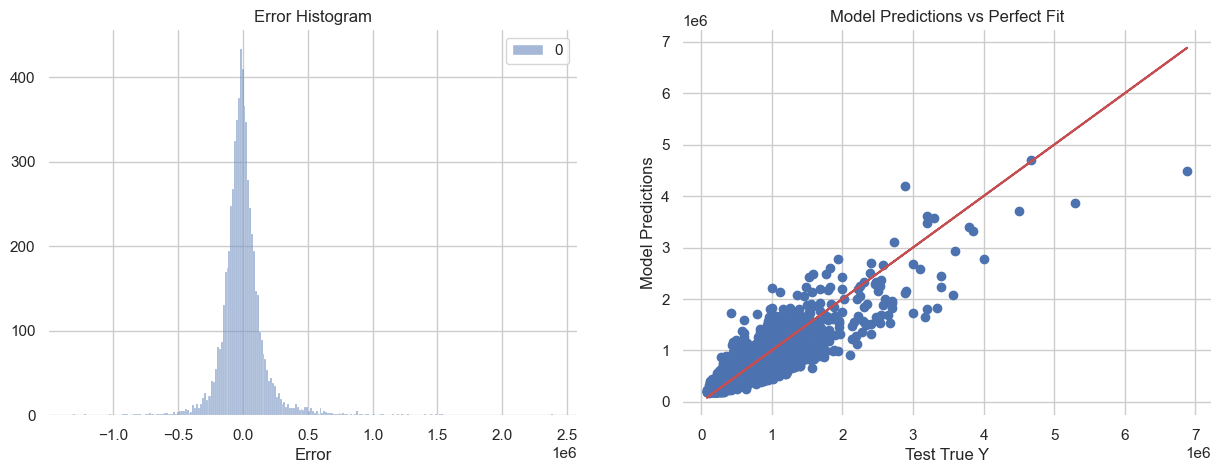

In [77]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
# Creates a figure with 1 row and 2 columns of subplots, each 15x5 inches in size.

# Our model predictions
plt.scatter(y_valid,predictions)
# Plots a scatterplot on the second subplot (axes[1]) showing the actual values (`y_valid`) vs. predicted values (`predictions`).
# Helps visualize how close the predictions are to the true values.

# Perfect predictions
plt.plot(y_valid,y_valid,'r')
# Plots a perfect prediction line in red, representing where predictions would lie if they were exactly correct.

errors = y_valid.values.reshape(6484, 1) - predictions
# Calculates the prediction errors by subtracting the predicted values from the actual values.
# Reshapes the `y_valid` values to ensure compatibility with the `predictions` array.

sns.histplot(errors, ax=axes[0])
# Creates a histogram on the first subplot (axes[0]) to visualize the distribution of errors (residuals).

sns.despine(left=True, bottom=True)  
# Removes the left and bottom spines from the plot for a cleaner appearance.

axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')  
# Sets the x-axis label, title, and removes the y-axis label for the error histogram.


axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')  
# Sets the x-axis label, y-axis label, and title for the scatter plot comparing predictions to actual values.

__Predicting a new comer house__

We are going to use the model to predict the price on a brand-new house. We are going to choose the first house of the data set and drop the price. single_house is going to have all the features that we need to predict the price. After that we need to reshape the variable and scale the features.

The original price is 221,900 and the model prediction is ~ $285,000.


In [78]:
# Features of new house
single_house = housePrices.drop('price', axis=1).iloc[0]  
# Selects the first house in the dataset and drops the 'price' column to extract only the feature values.
# `iloc[0]` retrieves the first row of the DataFrame.

print(f'Features of new house:\n{single_house}')  
# Prints the feature values of the selected house for reference.

# Reshape the numpy array and scale the features based on the number of features in `single_house`
single_house = scaler.transform(single_house.values.reshape(1, -1))  
# Converts the feature values of the selected house into a NumPy array.
# Reshapes the array to match the expected input shape for the scaler (1 sample with multiple features).
# Scales the feature values using the previously fitted `scaler` to ensure consistency with the training process.

# Run the model and get the price prediction
print('\nPrediction Price:', model.predict(single_house)[0, 0])  
# Passes the scaled features of the selected house to the trained model to predict its price.
# The `[0, 0]` indexing extracts the predicted price from the model's output, which is a 2D array.

# Original price
print('\nOriginal Price:', housePrices.iloc[0]['price'])  
# Retrieves and prints the actual price of the selected house from the original dataset for comparison with the predicted price.

Features of new house:
bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Prediction Price: 274747.94

Original Price: 221900.0


/Users/pipepatino/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


---
---

# Analisis por grupos del dataset
## 1. Filtrar el Dataset:
Dividiremos las casas en dos subconjuntos basándonos en el precio:

- Mayor a 3 millones de dólares
- Menor o igual a 3 millones de dólares

In [35]:
# Filtrar casas con precios mayores y menores a 3 millones
above_3m = housePrices[housePrices['price'] > 3000000]
below_3m = housePrices[housePrices['price'] <= 3000000]

In [36]:
above_3m.shape

(45, 20)

In [37]:
below_3m.shape

(21568, 20)

## 2. Preparar los Datos para Entrenamiento
Realizamos el preprocesamiento:

- Escalado de características
- Normalizamos los datos (sin incluir la columna price), y dividimos en entrenamiento y validación.

In [38]:
# Separar características (X) y target (y) para ambos subconjuntos
X_above = above_3m.drop(['price'], axis=1)  # Excluyendo el precio y la fecha
y_above = above_3m['price']

X_below = below_3m.drop(['price'], axis=1)
y_below = below_3m['price']

# Escalar características
scaler_above = StandardScaler()
X_above_scaled = scaler_above.fit_transform(X_above)

scaler_below = StandardScaler()
X_below_scaled = scaler_below.fit_transform(X_below)

# Dividir en conjunto de entrenamiento y validación
X_train_above, X_valid_above, y_train_above, y_valid_above = train_test_split(
    X_above_scaled, y_above, test_size=0.2, random_state=42
)

X_train_below, X_valid_below, y_train_below, y_valid_below = train_test_split(
    X_below_scaled, y_below, test_size=0.2, random_state=42
)

## 3. Crear y Entrenar el Modelo
Dado que el modelo ya está definido, lo utilizaremos directamente. Procederemos con el entrenamiento para ambos subconjuntos de datos (casas por encima y por debajo de $3M).

**Crear los modelos**
<br>
<br>
Primero, definimos los modelos para cada subconjunto:

In [39]:
# Modelo para casas con precios > $3M
model_above = Sequential()
model_above.add(Dense(19, activation='relu', input_dim=X_train_above.shape[1]))
model_above.add(Dense(19, activation='relu'))
model_above.add(Dense(19, activation='relu'))
model_above.add(Dense(19, activation='relu'))
model_above.add(Dense(1))  # Capa de salida
model_above.compile(optimizer='adam', loss='mse')

# Modelo para casas con precios <= $3M
model_below = Sequential()
model_below.add(Dense(19, activation='relu', input_dim=X_train_below.shape[1]))
model_below.add(Dense(19, activation='relu'))
model_below.add(Dense(19, activation='relu'))
model_below.add(Dense(19, activation='relu'))
model_below.add(Dense(1))  # Capa de salida
model_below.compile(optimizer='adam', loss='mse')


/Users/pipepatino/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Entrenar los modelos** 
<br>
<br>
Entrenamos ambos modelos con los datos correspondientes. Usamos un batch size de 128 y 400 épocas (puedes ajustar esto más adelante):

In [40]:
# Entrenamiento para casas con precios > $3M
history_above = model_above.fit(
    X_train_above, y_train_above,
    validation_data=(X_valid_above, y_valid_above),
    batch_size=128, epochs=400, verbose=1
)

# Entrenamiento para casas con precios <= $3M
history_below = model_below.fit(
    X_train_below, y_train_below,
    validation_data=(X_valid_below, y_valid_below),
    batch_size=128, epochs=400, verbose=1
)


Epoch 1/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step - loss: 17054847467520.0000 - val_loss: 14283636211712.0000
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 17054845370368.0000 - val_loss: 14283635163136.0000
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 17054845370368.0000 - val_loss: 14283635163136.0000
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 17054847467520.0000 - val_loss: 14283635163136.0000
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 17054845370368.0000 - val_loss: 14283635163136.0000
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 17054845370368.0000 - val_loss: 14283634114560.0000
Epoch 7/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 17054845370368.0000 - val_loss: 14283632017408.0000
Epoch 8/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 17054843273216.0000 - val_loss: 14283632017408.0000
Epoch 9/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 17054845370368.0000 - val_loss: 14283630968832.0000
Epoch 10/

## 4. Evaluar y Comparar el Modelo
**Evaluar los Modelos**
<br>
<br>
Obtenemos las métricas del conjunto de validación para cada modelo.

In [41]:
# Evaluar el modelo para casas > $3M
loss_above = model_above.evaluate(X_valid_above, y_valid_above, verbose=0)

# Evaluar el modelo para casas <= $3M
loss_below = model_below.evaluate(X_valid_below, y_valid_below, verbose=0)

print(f"Mean Squared Error (Casas > $3M): {loss_above}")
print(f"Mean Squared Error (Casas <= $3M): {loss_below}")

Mean Squared Error (Casas > $3M): 13953585381376.0
Mean Squared Error (Casas <= $3M): 24128663552.0


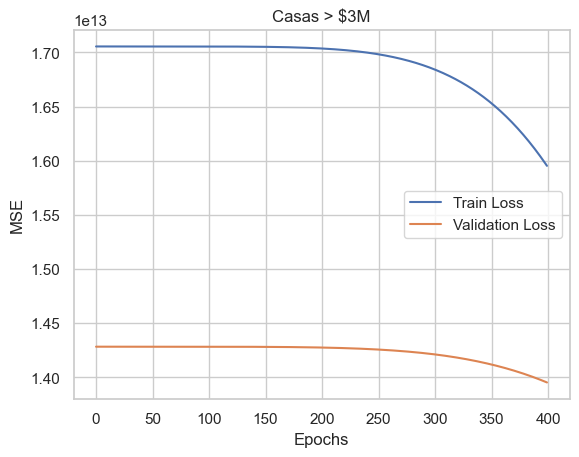

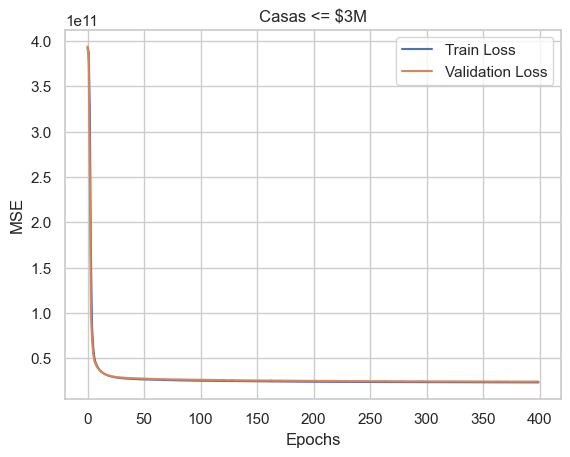

In [42]:
def plot_training_history(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

# Graficar las métricas para cada modelo
plot_training_history(history_above, 'Casas > $3M')
plot_training_history(history_below, 'Casas <= $3M')